In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
#시리얼 상자니까 리세스? ../DATA/reeses_puffs.png
reeses = cv2.imread('../DATA/reeses_puffs.png',0)

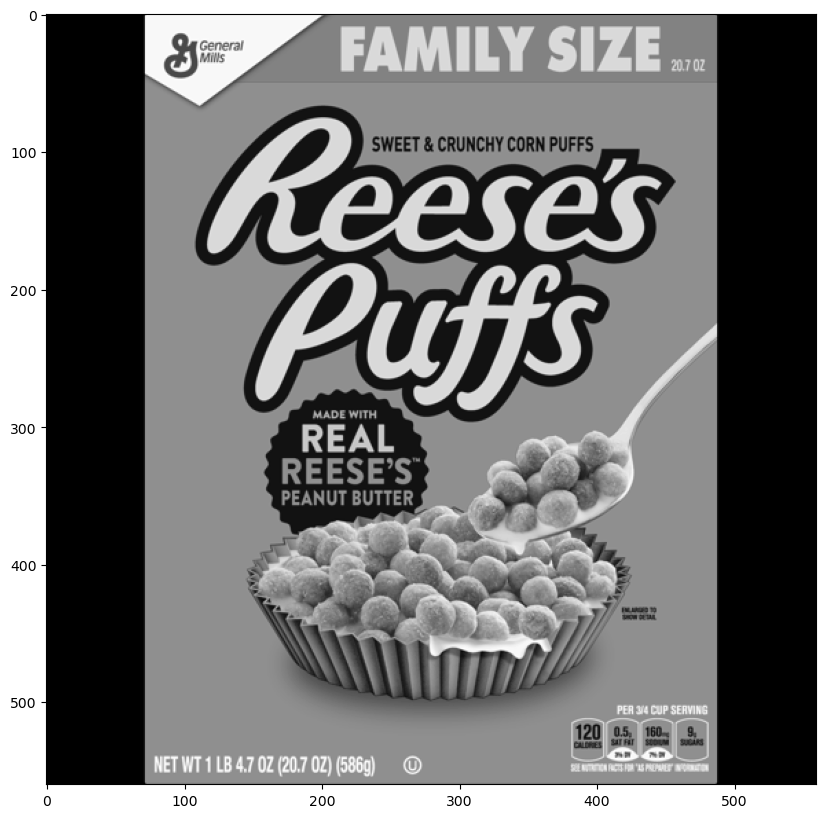

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0) #../DATA/many_cereals.jpg

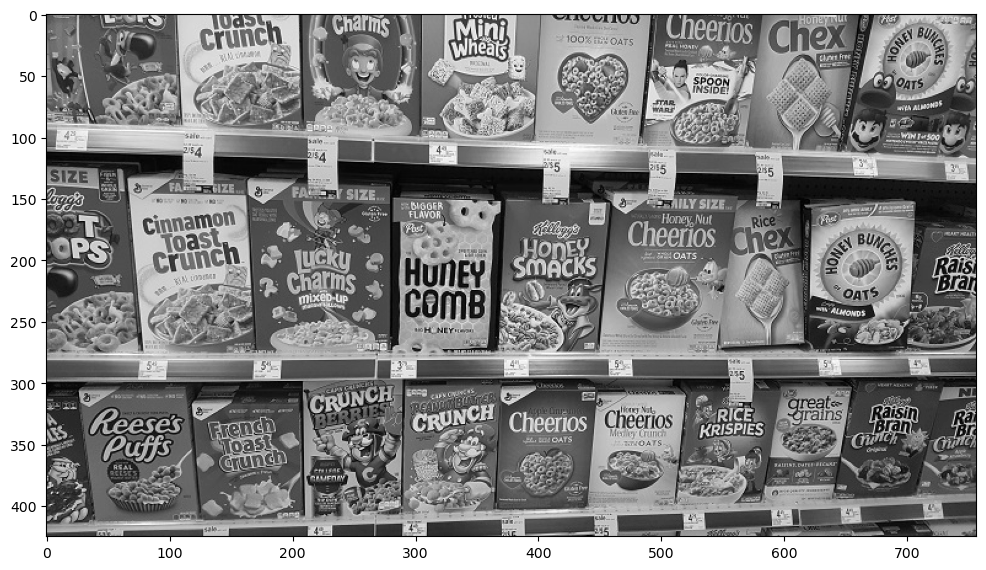

In [6]:
display(cereals)

In [7]:
#ORB 디스크립터로 Brute Force 활용
#탐지 항목을 만들어 특징을 탐지하고 산출하게 함 
orb = cv2.ORB_create()

In [8]:
#그리고 타겟 이미지와 2차 이미지인 리세스와 시리얼에서 실행 
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True) #매핑을 확인하는 기본적인 방법


In [10]:
matches = bf.match(des1,des2)


In [11]:
# single_match = matches[0]
#single_match.distance
# distance값이 낮을수록 매칭하기 좋고 높을수록 힘듬 


In [12]:
matches = sorted(matches, key = lambda x:x.distance)

In [13]:
#matches[25]는 매칭항목중 25개만 나오게, none는 마스크가 필요한지 여부, flag는 실제로 매칭을 어떻게 그릴 건지
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

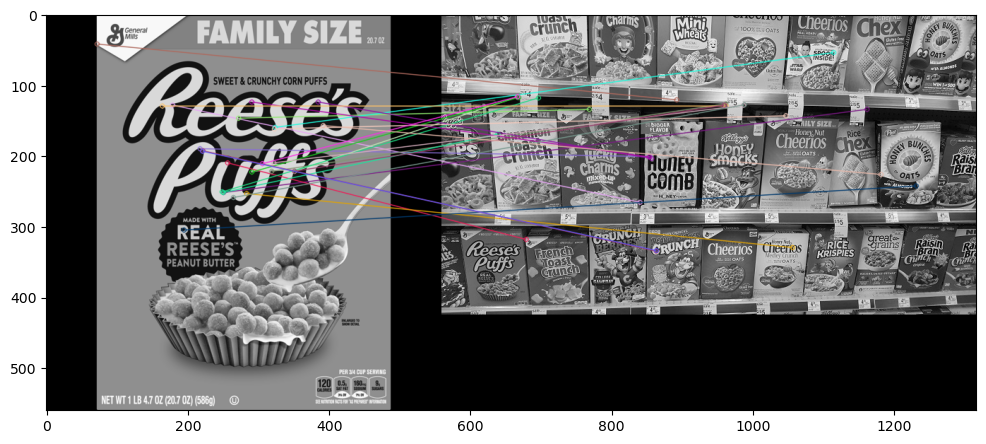

In [14]:
display(reeses_matches) #25개의 매칭결과가 그렇게 좋지 않음 
#더 정밀한 방법 필요 
#SIFT와 ratio test를 활용한 Brute Force 매칭과 FLANN 기반 매칭 살펴보기 
# SIFT = 크기 불변 크기 변환 

In [15]:
sift = cv2.xfeatures2d.SIFT_create()
#설치 안된 오류 발생시  pip install opencv-contrib-python

In [16]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [17]:
bf = cv2.BFMatcher()

In [18]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [19]:
matches = bf.knnMatch(des1,des2,k=2) #이 작업은 두가지의 기술자와 k를 필요로 함

In [20]:
good = []

for match1,match2 in matches:
    #첫번째 값의 거리와 두번째 값의 거리가 75파 이하로 나오면 
    # 그 기술자의 특정 열은 좋은 값을 가진다는 뜻 
    if match1.distance <0.75*match2.distance:
        good.append([match1])

In [21]:
len(good)

79

In [22]:
#matches -> 값 나오는데 이게 가까울수록 매칭 잘된거 -> ratiotest로 이게 상대적으로 근접한지 확인해봄 
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

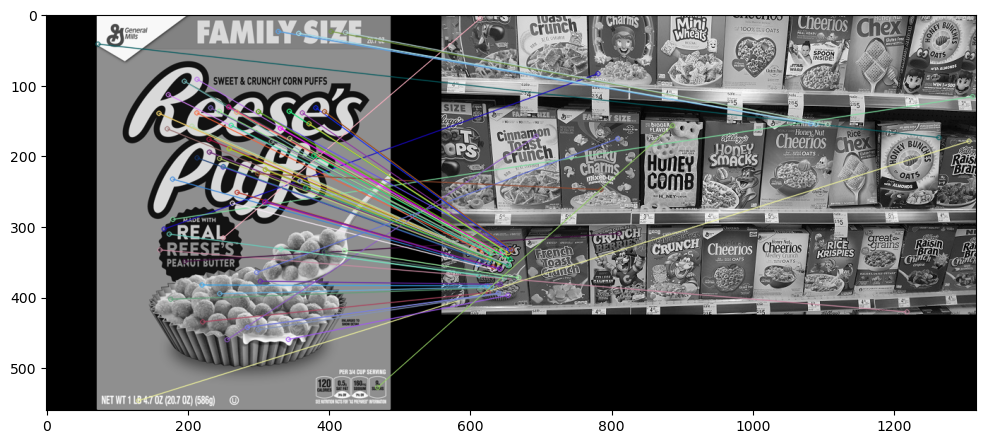

In [23]:
display(sift_matches)

In [24]:
#FLAN 기반 매칭 
sift = cv2.xfeatures2d.SIFT_create()

In [25]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [ ]:
#FLANN ->근접 지점을 찾는 빠른 라이브러리 
#brute force 측정보다 훨씬 빠르지만 최상의 값은 찾지 못함, 일반적으로 괜찮은값 산출? 
#대충 특징 매칭 2부에서 9분 40초에서 건너뛰긴 함 